<a href="https://colab.research.google.com/github/Suraj110597/Online-Retail-Customer-Segmentation/blob/main/Suraj_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import datetime as dt
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt


In [ ]:
#importing libraries
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Dataset
df= pd.read_excel('/content/drive/MyDrive/Online Retail (1).xlsx')

In [ ]:
#first 5 observations
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#last five observation
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
#total no. observations and features
df.shape

(541909, 8)

In [ ]:
#checking important stats of the given dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#checking data type and null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**This shows that the given dataset has a null value in 'CustomerID'attribute.**

# **Data Preprocessing**

In [ ]:
#checking null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
#dropping cancelled orders
df=df[~df["InvoiceNo"].str.startswith("C",na=False)]

**As per given in the problem, 'InvoiceNo' starts with letter 'C' is cancellation. So dropping those cancelled orders.**

In [ ]:
#new shape after dropping null and cancelled orders
df.shape

(397924, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
#list of columns
list_of_col=list(df.columns)
print(list_of_col)

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
#value_counts of unit price
df['UnitPrice'].value_counts()

1.25      45841
1.65      36834
2.95      26562
0.85      25968
0.42      21812
          ...  
1.23          1
3.30          1
275.60        1
635.01        1
376.50        1
Name: UnitPrice, Length: 441, dtype: int64

In [ ]:
#taking only those observation which have valid unit price
df=df[df['UnitPrice']>=0]

In [ ]:
#checking whether if any value less than zero for 'quantity' attribute
(df[df['Quantity']<=0].values.any())

False

In [ ]:
#checking whether if any value less than zero for 'invoiceNo.' attribute
(df[df['InvoiceNo']<=0].values.any())

False

In [ ]:
#checking whether if any value less than zero for 'stockcode' attribute
(df[df['StockCode']==0].values.any())

False

In [ ]:
#checking whether if any value less than zero for 'customerid' attribute
(df[df['CustomerID']<=0].values.any())

False

In [ ]:
#counting the total no. of unique value for specific column using for loop
for i in list_of_col:
  print(f"The no. of unique valued in {i} is {df[i].nunique()}")

The no. of unique valued in InvoiceNo is 18536
The no. of unique valued in StockCode is 3665
The no. of unique valued in Description is 3877
The no. of unique valued in Quantity is 302
The no. of unique valued in InvoiceDate is 17286
The no. of unique valued in UnitPrice is 441
The no. of unique valued in CustomerID is 4339
The no. of unique valued in Country is 37


**From here we can observe that the given dataset has a data of 37 countries with total 4339 customers**

In [ ]:
#datatype of InvoiceDate
df.InvoiceDate.dtype

dtype('<M8[ns]')

In [ ]:
#checking the time range of given dataset in terms of date
maxdate = df['InvoiceDate'].dt.date.max()
mindate = df['InvoiceDate'].dt.date.min()
print(f'The dataset that has been given has a time range from {mindate} to {maxdate} ')

The dataset that has been given has a time range from 2010-12-01 to 2011-12-09 


In [ ]:
print(f'So we have a dateset of {maxdate-mindate}')

So we have a dateset of 373 days, 0:00:00


**So we have been given a dataset of 373 days ,almost of 1 year.**

In [ ]:
#distinguising InvoiceDate
df['Hour'] = df['InvoiceDate'].dt.hour
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['DayName'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Weekday,DayName,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,Wednesday,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,Wednesday,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,Wednesday,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,Wednesday,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,Wednesday,12


**Converting the InvoiceDate into Hour,Day,Month and adding these attributes into the dataset**

# **EDA on Dataset**

In [ ]:
#unique countries
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [ ]:
c=df['Country'].count()
print(c)

397924


In [ ]:
#normalized scores of countries
df['Country'].value_counts()/c

United Kingdom          0.890484
Germany                 0.022723
France                  0.020964
EIRE                    0.018189
Spain                   0.006245
Netherlands             0.005938
Belgium                 0.005104
Switzerland             0.004629
Portugal                0.003674
Australia               0.002978
Norway                  0.002694
Italy                   0.001905
Channel Islands         0.001880
Finland                 0.001721
Cyprus                  0.001543
Sweden                  0.001133
Austria                 0.001000
Denmark                 0.000955
Poland                  0.000829
Japan                   0.000807
Israel                  0.000623
Unspecified             0.000613
Singapore               0.000558
Iceland                 0.000457
USA                     0.000450
Canada                  0.000379
Greece                  0.000364
Malta                   0.000281
United Arab Emirates    0.000171
European Community      0.000151
RSA       

**From the above cell we can see that United Kingdom is country with almost 90% observation in a given dataset**

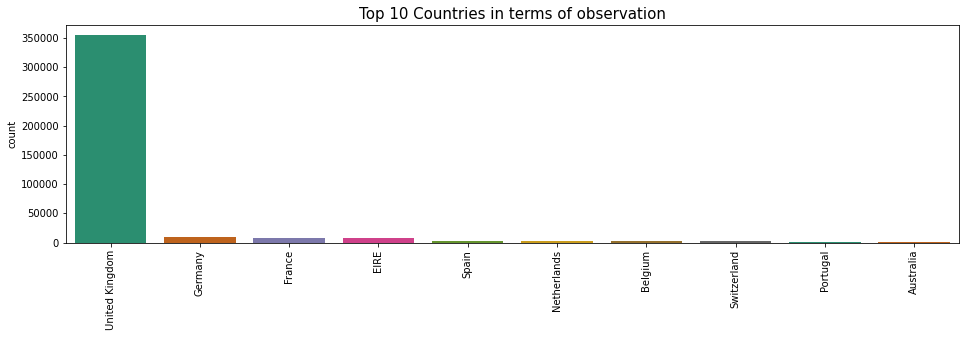

In [ ]:
#countplot of the top 10 Countries in terms of observation
plt.figure(figsize=(16,4))
sns.countplot(x= df['Country'], data=df,palette='Dark2',order=df.Country.value_counts().iloc[:10].index)
plt.title("Top 10 Countries in terms of observation", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

**Plot is also showing that most of the observations of 'United Kingdom'**

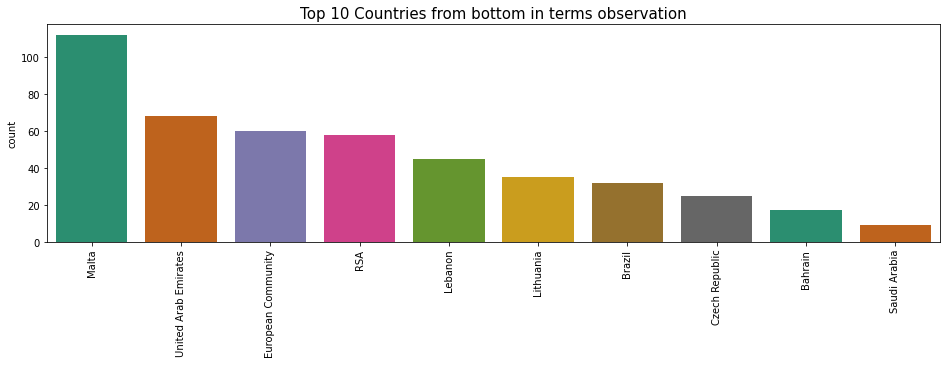

In [ ]:
#countplot of the top 10 Countries from bottom in terms of observation
plt.figure(figsize=(16,4))
sns.countplot(x= df['Country'], data=df,palette='Dark2',order=df.Country.value_counts().iloc[-10:].index)
plt.title("Top 10 Countries from bottom in terms observation", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

**From plot Saudi Arabia is a country with least no. of observation**

In [ ]:
#filtering dataset
df=df[df['Country']=='United Kingdom' ]

**As we have seen that almost 90% of observations in the our given dataset is of UK, thus taking the observationss that only consist of UK.**

In [ ]:
#new info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354345 non-null  object        
 1   StockCode    354345 non-null  object        
 2   Description  354345 non-null  object        
 3   Quantity     354345 non-null  int64         
 4   InvoiceDate  354345 non-null  datetime64[ns]
 5   UnitPrice    354345 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      354345 non-null  object        
 8   Hour         354345 non-null  int64         
 9   Weekday      354345 non-null  int64         
 10  DayName      354345 non-null  object        
 11  Month        354345 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 35.1+ MB


In [ ]:
#grouping the items in terms of quantity
ax=df.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).reset_index()[:10]
ax.head(10)

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,76919
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,49182
3,JUMBO BAG RED RETROSPOT,41981
4,WHITE HANGING HEART T-LIGHT HOLDER,34648
5,ASSORTED COLOUR BIRD ORNAMENT,32727
6,POPCORN HOLDER,28935
7,PACK OF 12 LONDON TISSUES,24337
8,BROCADE RING PURSE,22711
9,PACK OF 72 RETROSPOT CAKE CASES,22465


**So from above cell we can see that the products those which have been highly purchased in terms of their quantiies are PAPER CRAFT LITTLE BIRDIE, MEDIUM CERAMIC TOP STORAGE JAR, WORLD WAR 2 GLIDERS ASSTD DESIGNS etc.**

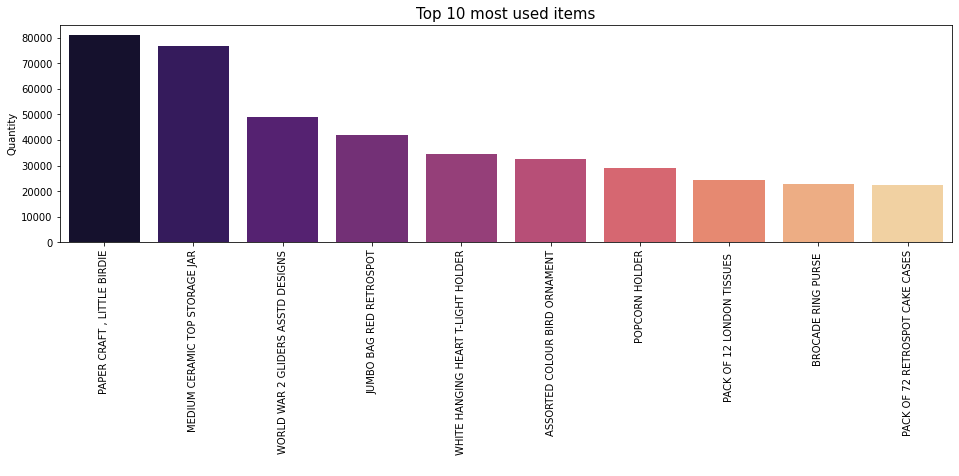

In [ ]:
#most used items in terms of quantity
plt.figure(figsize=(16,4))
sns.barplot(x= ax.Description,y=ax.Quantity, data=ax,palette='magma')
plt.title("Top 10 most used items", size=15)
plt.xticks(rotation=90)
plt.xlabel(" ")
plt.show()

**Above plot is showing the items that are been sold so much in terms of their qunatity are PAPER CRAFT , LITTLE BIRDIE,MEDIUM CERAMIC TOP STORAGE JAR
WORLD WAR 2 GLIDERS ASSTD DESIGNS etc.**

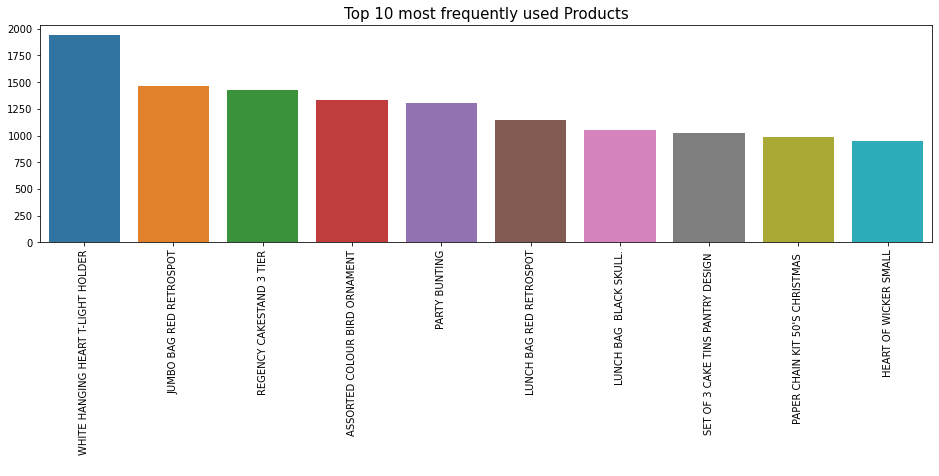

In [ ]:
# The most frequently purchased products from the store
most_purchase = df.groupby('Description')['Quantity'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(16,4))
sns.barplot(x=most_purchase.index, y=most_purchase.values)
plt.xticks(rotation=90)
plt.title("Top 10 most frequently used Products", size=15)
plt.xlabel(" ")
plt.show()

**The some of the most demanding products are WHITE HANGING HEART T-LIGHT HOLDER, JUMBO BAG RED RETROSPOT etc**

# **Feature Engineering**

In [ ]:
#adding new feature in a dataset
df['TotalSales'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hour,Weekday,DayName,Month,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,8,2,Wednesday,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,Wednesday,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,2,Wednesday,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,Wednesday,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,8,2,Wednesday,12,20.34


**To check out the total amount of sales of the products we have added a new attribute 'TotalSales' in the dataset.**

In [ ]:
#checking customer who came quite frequently in the store
df['CustomerID'].value_counts()

17841.0    7847
14096.0    5111
12748.0    4596
14606.0    2700
15311.0    2379
           ... 
17925.0       1
13017.0       1
13302.0       1
13307.0       1
15316.0       1
Name: CustomerID, Length: 3921, dtype: int64

**Checking the customers who are quite frequent in the store.**

In [ ]:
# The highest no. sales from customer
highest_sales= df.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
highest_sales.head(5)

CustomerID
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
17511.0     91062.38
16029.0     81024.84
Name: TotalSales, dtype: float64

**From the above cell we can see that CustomerID
18102.0 is generating a sales of 259657.30, highest among the customers**

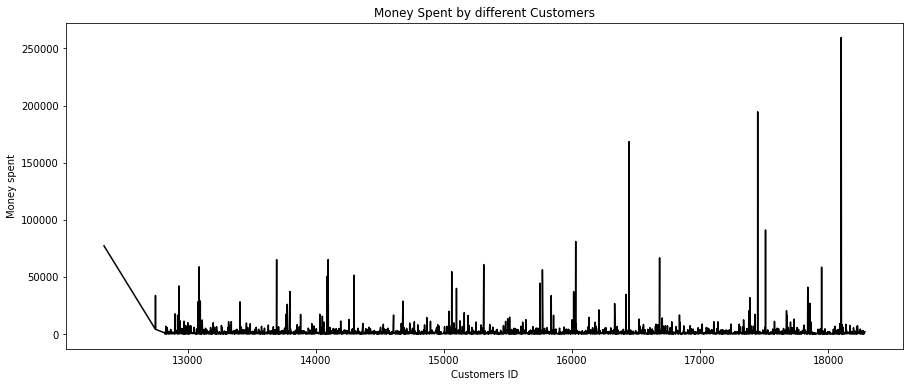

In [ ]:
#subplot to checkout total sales by each customer
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['TotalSales'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.TotalSales,color='k')
plt.xlabel('Customers ID')
plt.ylabel('Money spent')
plt.title('Money Spent by different Customers')
plt.show()

**From the above subplot we can see that there are very few customers who are spending above $5k.**

**On average most of the customers are spending around $5k-10k.**

In [ ]:
#checking transactions for each month
ax = df.groupby('InvoiceNo')['Month'].value_counts().sort_index()
ax.head(5)

InvoiceNo  Month
536365     12        7
536366     12        2
536367     12       12
536368     12        4
536369     12        1
Name: Month, dtype: int64

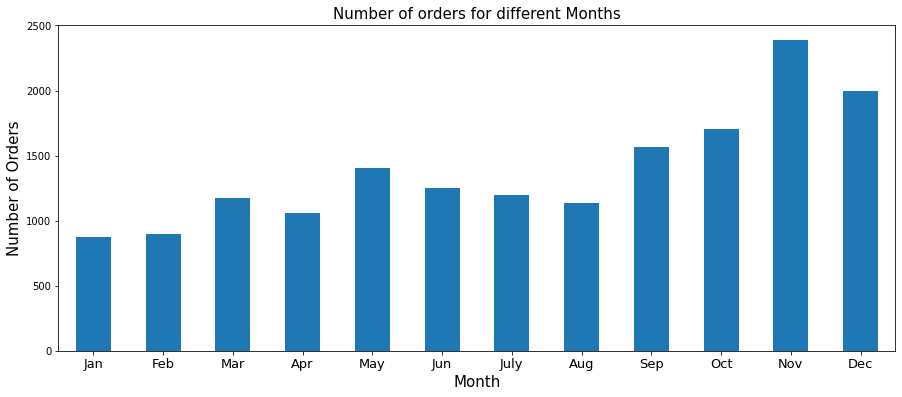

In [ ]:
#represnting transaction of each month by bar plot
ax = df.groupby('InvoiceNo')['Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months',fontsize=15)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'), rotation='horizontal', fontsize=13)
plt.show()

**From the above bar plot we can say that NOVEMBER is the month in which most no. of transaction happened, then followed by December,October etc.**

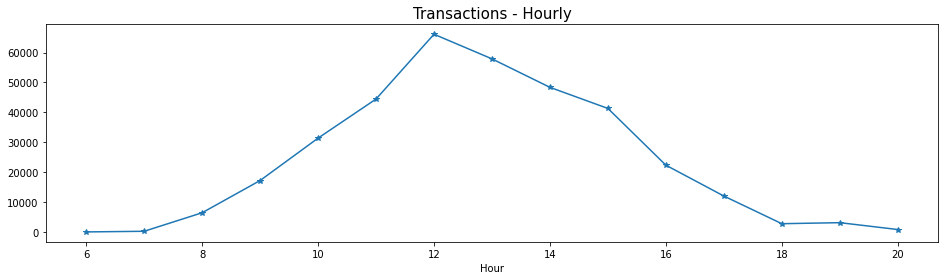

In [ ]:
#represnting transaction on hourly basis 
hour = df.groupby('Hour')['Quantity'].count()
plt.figure(figsize=(16,4))
hour.plot(marker='*')
plt.title("Transactions - Hourly", size=15)
plt.show()

**From the above  plot we can say that at 12.00 PM is the time in which most no. of transaction happened and least happened at 6AM.**

In [ ]:
#checking transactions for each day
ax = df.groupby('InvoiceNo')['Weekday'].value_counts().sort_index()
ax.head()

InvoiceNo  Weekday
536365     2           7
536366     2           2
536367     2          12
536368     2           4
536369     2           1
Name: Weekday, dtype: int64

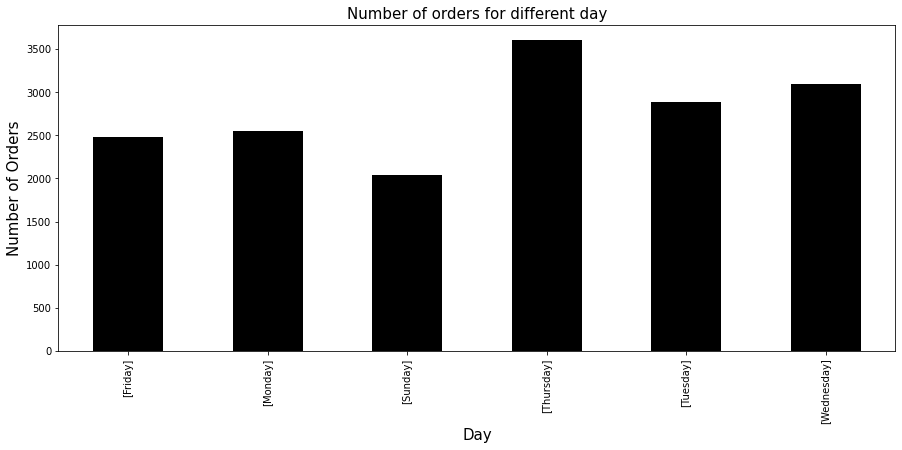

In [ ]:
#represnting transaction on daily basis
ax = df.groupby('InvoiceNo')['DayName'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6),color='black')
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different day',fontsize=15)
#ax.set_xticklabels((), rotation='horizontal', fontsize=13)
plt.show()

**From the above plot we can say that Thursday is the day on which most no. of transaction happened and one thing is also significant that is therer is no sale on Saturday.**

# **Models Implementation**

# **RFM Modeling**

To do the RFM analysis, we need to create 3 features from the data:

**Recency** - Latest date - Last invoice date. (Number of days since the last purchase date)

**Frequency** - count of invoice numbers. (Total number of transactions made by a unique customer)

**Monetary** - Sum of Total sales. (Total value of transacted sales by each customer)

Now, let's create a function which can be used to generate the RFM features.

In [ ]:
#current date for rfm
current_date = max(df.InvoiceDate) + dt.timedelta(days=1)
print('Current date: {}'.format(current_date.date()))

Current date: 2011-12-10


In [ ]:
#implementing the rfm modelling technique 
df_rfm = df.groupby(['CustomerID'],as_index=False).agg({'InvoiceDate': lambda x: (current_date - x.max()).days,
                                             'InvoiceNo': 'count',
                                             'TotalSales': 'sum'})

**Implementation of RFM on the given dataset**

In [ ]:
# Change the name of columns
df_rfm.columns=['CustomerID',"Recency", "Frequency", "Monetary"]

**After implementation of RFM,changing the attributes name in our new dataset.**

In [ ]:
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,1,4596,33719.73
3,12749.0,4,199,4090.88
4,12820.0,3,59,942.34


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

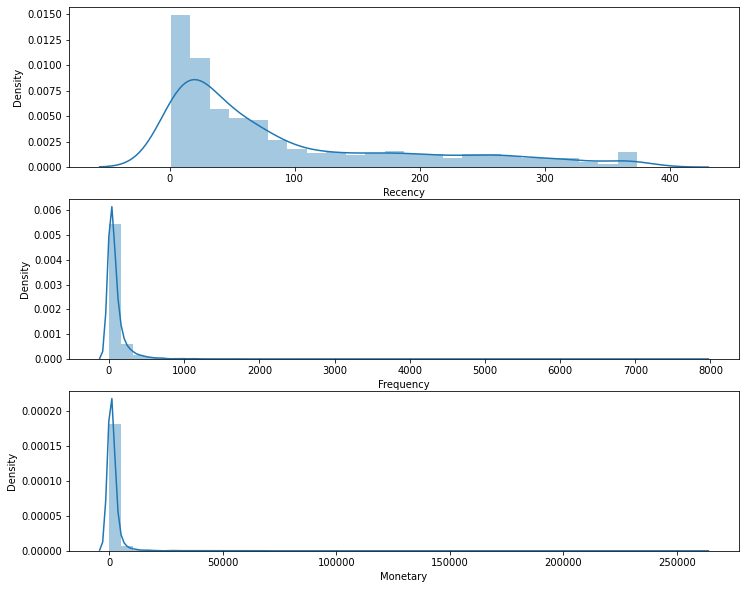

In [ ]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(12,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(df_rfm['Recency'])

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(df_rfm['Frequency'])

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(df_rfm['Monetary'])

**Distributions of Recency, Frequency, and Monetary features**

In [ ]:
#stats pf new dataset
df_rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,92.188472,90.371079,1863.910113
std,1576.823683,99.528995,217.796155,7481.922217
min,12346.000000,1.000000,1.000000,0.000000
25%,14208.000000,18.000000,17.000000,300.040000
50%,15569.000000,51.000000,41.000000,651.820000
75%,16913.000000,143.000000,99.000000,1575.890000
max,18287.000000,374.000000,7847.000000,259657.300000


In [ ]:
#creating a new dataset only with r, f, m attributes
raw_data = df_rfm[['Recency','Frequency','Monetary']]

**New dataset with Recency, Frequency and Monetary attributes only.**

In [ ]:
#first 5 observation
raw_data.head()

,Recency,Frequency,Monetary
0,326,1,77183.60
1,2,103,4196.01
2,1,4596,33719.73
3,4,199,4090.88
4,3,59,942.34


In [ ]:
#checking if there is any negative value in monetary attributres
(raw_data[raw_data['Monetary']<=0].values.any())

True

In [ ]:
#dropping negative values
raw_data = raw_data[raw_data['Monetary'] > 0]

**As there are some negative value in a Monetary attribute so just dropping those observation**

# **Feature Scaling:**
# **Log Transform**

Since, all the features like Recency, Frequency and Monetary value are within varying ranges of values, we need to standardize them. In addition, the feature like "Monetary" can take a very large range of values. So, to standardize all the inputs features, we apply log transform, so that the input to our clustering algorithm is a set of well scaled and transformed features.

In [ ]:
#taking logarithm of the dataset
data_log = np.log(raw_data)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)

# Create a pandas DataFrame
norm_df = pd.DataFrame(data=data_log, index=raw_data.index, columns=raw_data.columns)

In [ ]:
#first five observations of the new created dataset
norm_df.head()

,Recency,Frequency,Monetary
0,5.786897,0.000000,11.253942
1,0.693147,4.634729,8.341889
2,0.000000,8.432942,10.425838
3,1.386294,5.293305,8.316515
4,1.098612,4.077537,6.848366


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

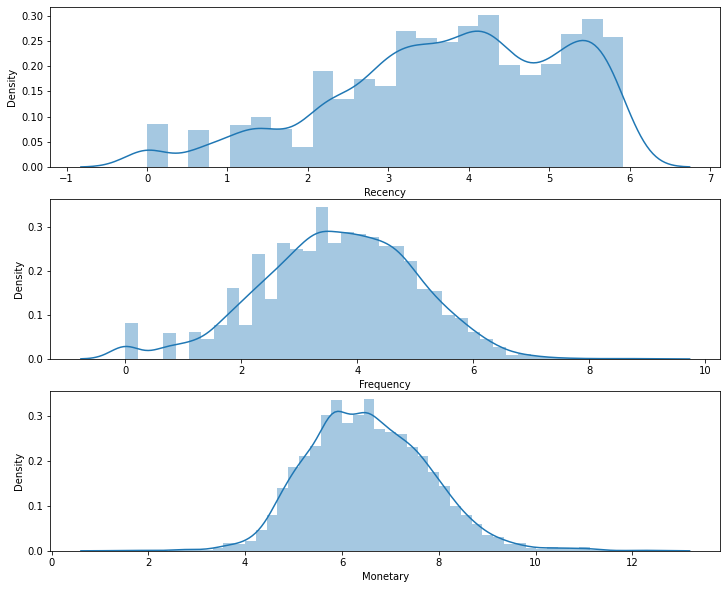

In [ ]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(norm_df['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(norm_df['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(norm_df['Monetary'])

# Show the plot

# **Clustering with K-means algorithm**

# **Elbow Method**



In this section, we will build multiple clusters upon our RFM data (data_norm) and will try to find out the optimal number of clusters in our data using the **elbow method**.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sse = {}

# Fit KMeans and calculate SSE for each k
for k in range(1, 21):
  
    # Initialize KMeans with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    # Fit KMeans on the normalized dataset
    kmeans.fit(norm_df)
    
    # Assign sum of squared distances to k element of dictionary
    sse[k] = kmeans.inertia_

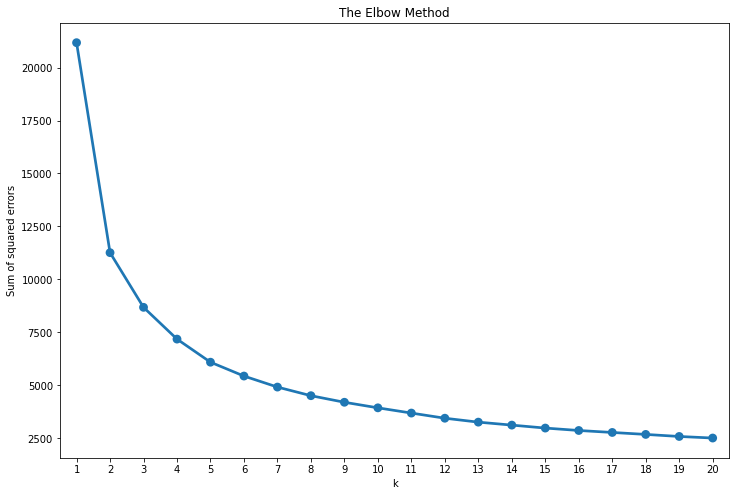

In [ ]:
plt.figure(figsize=(12,8))

plt.title('The Elbow Method')
plt.xlabel('k'); 
plt.ylabel('Sum of squared errors')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

**From the above plot, we can see that the optimal number of cluster is 3 or 4.**

**Let's take k = 3**

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=1,max_iter=2000)

# Compute k-means clustering on pre-processed data
kmeans.fit(norm_df)
y_kmeans= kmeans.predict(norm_df)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

**Applying K means clustering on the dataset that is 'norm_df'.**

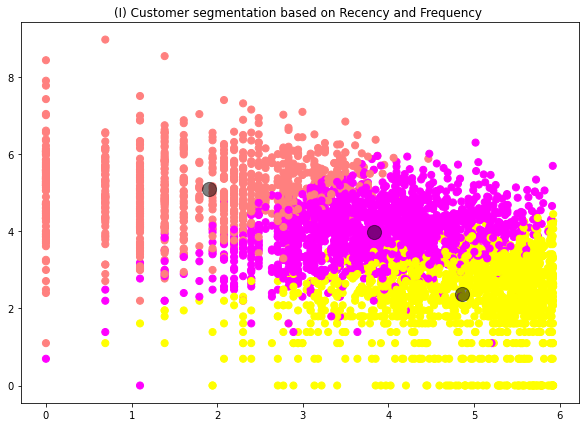

In [ ]:
#plotting segmentation based on Recency and Monetary
plt.figure(figsize=(10,7))
plt.title('(I) Customer segmentation based on Recency and Frequency ')
plt.scatter(norm_df.iloc[:, 0], norm_df.iloc[:, 1], c=y_kmeans, s=50, cmap='spring')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

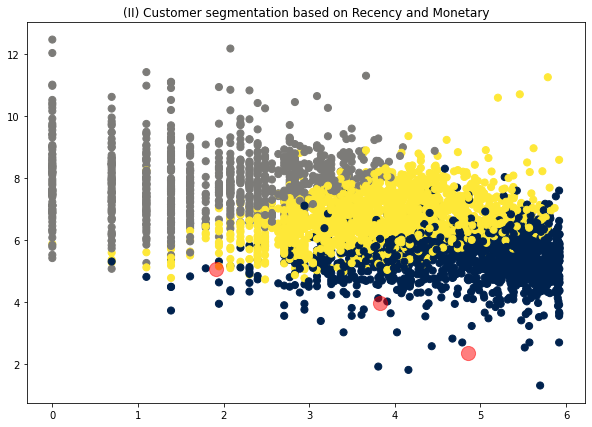

In [ ]:
#plotting segmentation based on Recency and Monetary
plt.figure(figsize=(10,7))
plt.title('(II) Customer segmentation based on Recency and Monetary')
plt.scatter(norm_df.iloc[:, 0], norm_df.iloc[:, 2], c=y_kmeans, s=50, cmap='cividis_r')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=0.5)

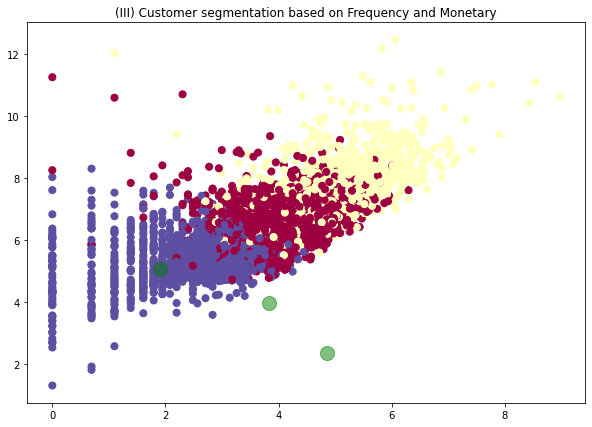

In [ ]:
#plotting segmentation based on Recency and Monetary
plt.figure(figsize=(10,7))
plt.title('(III) Customer segmentation based on Frequency and Monetary')
plt.scatter(norm_df.iloc[:, 1], norm_df.iloc[:, 2], c=y_kmeans, s=50, cmap='Spectral')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='green', s=200, alpha=0.5)

**CONCLUSION FROM ELBOW METHOD**


**(I) In this plot the key focus should be on 'red'patches that this customer s who have low recency and very good frequency**

**(II) In this plot the most important customers are those who having low reccency but very high monetary that is 'grey' patches**

**(III) In this figure the customers with 'pale yellow' patches which dipicts high frequency and high monetary.**  

# **Silhouette analysis**

Clustering is an unsupervised classification techinque to understand the groups of classes in the data. We use the K-means clustering algorithm to determine the ideal segments of customers.


**Silhouette analysis** can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

In [ ]:
#Load all the required packages
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

For n_clusters = 2 The average silhouette_score is : 0.3939849166419273
For n_clusters = 3 The average silhouette_score is : 0.303759245451847
For n_clusters = 4 The average silhouette_score is : 0.3070422816660383


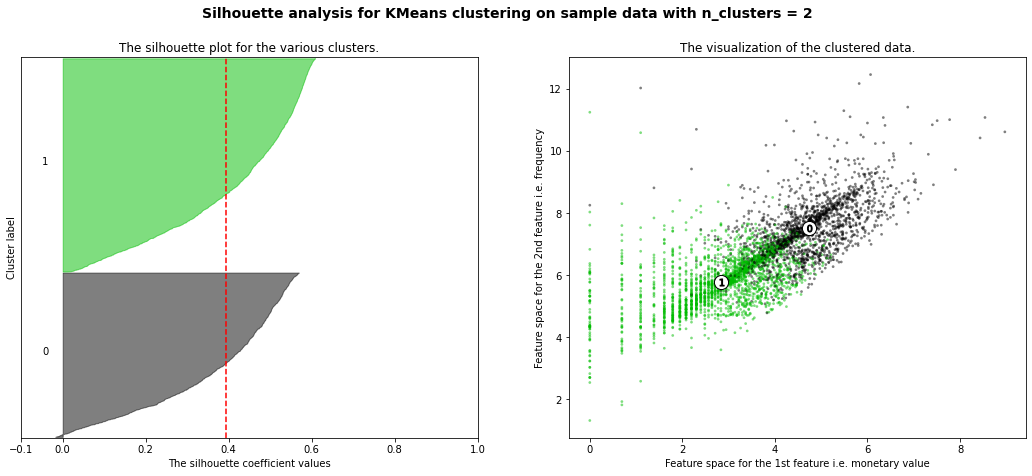

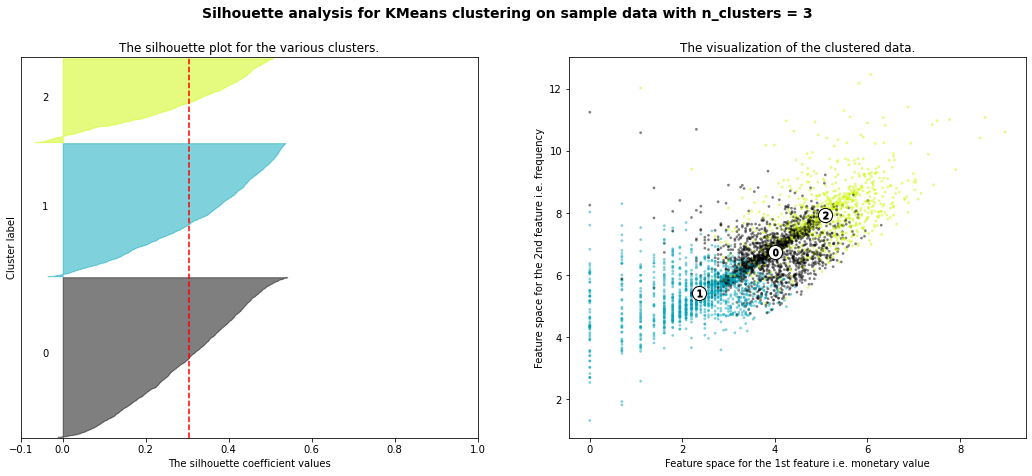

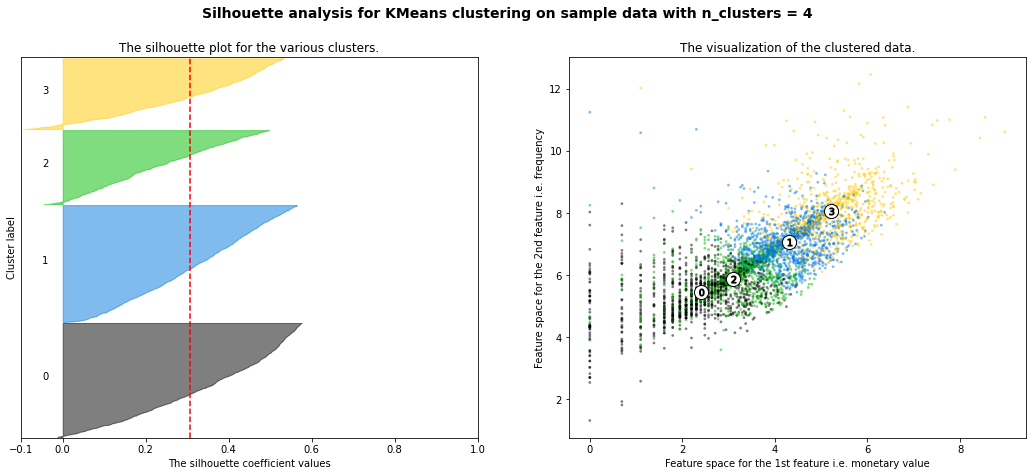

In [ ]:
X = norm_df

cluster_centers = dict()

for n_clusters in range(2,5,1):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    #Train a K-means clustering model with 3/ 5 clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    
    #classify cluster labels based on training data
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        #cmap = cm.get_cmap("Spectral")
        #colors = cmap(a / b)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.5)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #feature1 = 0
    #feature2 = 2
    ax2.scatter(X.iloc[:, 1], X.iloc[:, 2], marker='.', s=30, lw=0, alpha=0.5,
                c=colors, edgecolor='k')
    
    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 1], centers[:, 2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

After plotting a different n_clusters we can summarize that for **n_clusters = 2**

**The average silhouette_score is : 0.39**.So it is the best choice

# **Hierarchical Clustering**

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

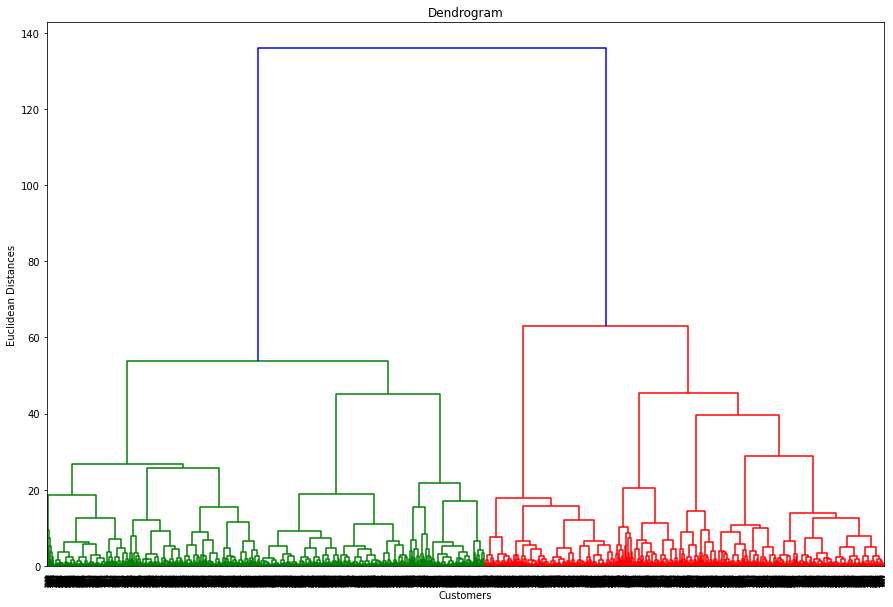

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

# **Way of Choosing the Number of Clusters in Hierarchical Clustering </b>**

### A **dendrogram** is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters. 

### We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in such a way that it cuts the tallest vertical line). 

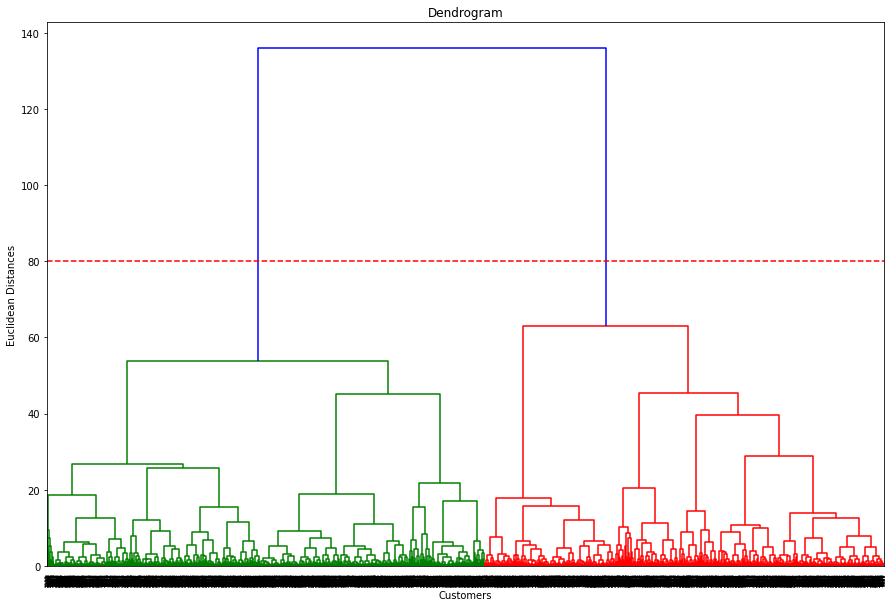

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

### <b> The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

### No. of Cluster  = 2

In [ ]:
#first five observations after normalizing the dataset
X.head()

,Recency,Frequency,Monetary
0,5.786897,0.000000,11.253942
1,0.693147,4.634729,8.341889
2,0.000000,8.432942,10.425838
3,1.386294,5.293305,8.316515
4,1.098612,4.077537,6.848366


In [ ]:
# Fitting hierarchical clustering to the  dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

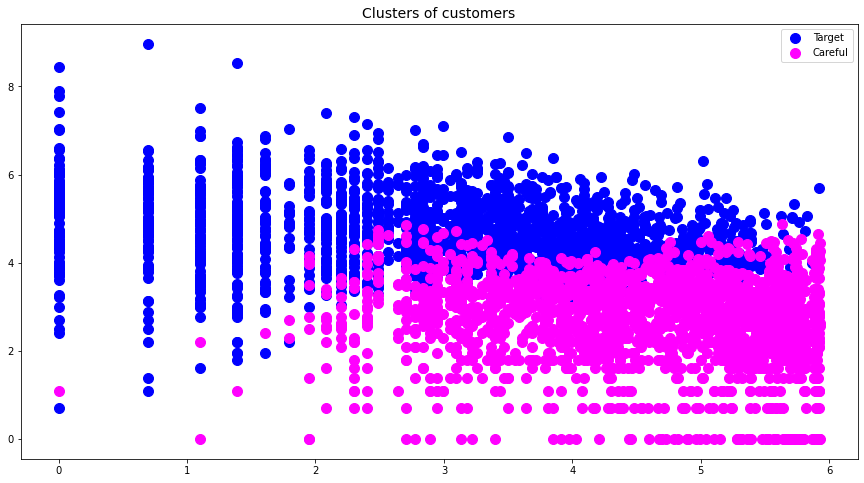

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(15,8))
plt.scatter(X.iloc[y_hc == 0, 0], X.iloc[y_hc == 0, 1], s = 100, c = 'blue', label = 'Target')
plt.scatter(X.iloc[y_hc == 1, 0], X.iloc[y_hc == 1, 1], s = 100, c = 'magenta', label = 'Careful')
#plt.scatter(X.iloc[y_hc == 2, 0], X.iloc[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Target')
#plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
#plt.scatter(X.iloc[y_hc == 4, 0], X0.iloc[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')

plt.title('Clusters of customers',fontsize=14)
#plt.xlabel('Reccency',fontsize=14)
#plt.ylabel('Frequency',fontsize=14)


plt.legend()
plt.show()

# **Conclusion**

**High monetary and more frequent(Target customer):**- These are those customer who have good Recceny,Frequency,Monetary.
As from the above hierarchical cluster plot the blue patches are representing those target customer.This means they are spending a lot of moneyand frequently coming to the store so they are very good customer for the store.

**High monetary value but less frequent:** These customers are coming very less in the srtore but whenever they come they are spending a huge amount of money,as dipicted in the (II) plot.

**Low monetary value but more frequent(Careful):** These customers are coming so frequent to the store but spending quite less. These are represented by **Careful** customers with pink patches in the above plot.

**Low monetary and less frequent:** These are the customer who are not the good for the store because they are spending less and are less frequent.


**So after doing customer segmentation we can say the company should focus on High monetary and more frequent(Target customer) and apart from that they can also focus High monetary value but less frequent customer by giving lucrative offers and coupons.** 